In [1]:
import numpy as np
import os
import sys

sys.path.insert(0, os.path.abspath(os.path.join('..', 'expsvm', 'explainpolysvm')))
import expsvm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


Create training data

The data in this toy example consists of two classes, one sampled from within the unit circle and the other from the ring with minimum radius 1 and maximum radius 1.41.

The classes are designed to be informative in the quadratic interactions x0*x0 and x1*x1, but not in the remaining interactions x0, x1 and x0x1.

In [2]:
n_train_per_class = 125  # We will later remove 25 samples per class to a test set.

# Radii for rings
r_min1 = 0.
r_max1 = 1.
r_min2 = 1.
r_max2 = 1.41

# Sample from classes
phi_train1 = 2 * np.pi * np.random.rand(n_train_per_class)
r_train1 = r_min1 + (r_max1 - r_min1) * np.random.rand(n_train_per_class, 1)
X_train1 = np.multiply(r_train1, np.transpose(np.array((np.cos(phi_train1), np.sin(phi_train1)))))

phi_train2 = 2 * np.pi * np.random.rand(n_train_per_class)
r_train2 = r_min2 + (r_max2 - r_min2) * np.random.rand(n_train_per_class, 1)
X_train2 = np.multiply(r_train2, np.transpose(np.array((np.cos(phi_train2), np.sin(phi_train2)))))


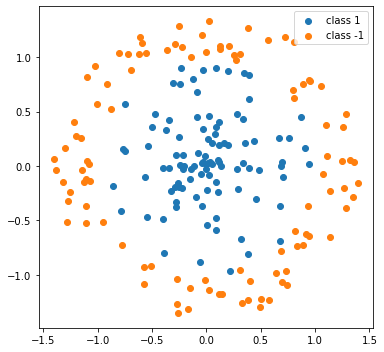

In [3]:
fig, ax = plt.subplots(1,1, figsize=(6,6))
ax.scatter(x=X_train1[:,0], y=X_train1[:,1])
ax.scatter(x=X_train2[:,0], y=X_train2[:,1])
ax.set_aspect('equal', adjustable='box')
plt.legend(['class 1', 'class -1'])
plt.savefig('./training_data.png', dpi=300,)
plt.draw()

Fit Scikit-learn SVC model using a quadratic polynomial kernel.

We are not really interested in classification performance, so the hyperparameters of the SVC model are set manually.

In [ ]:
X = np.concatenate((X_train1, X_train2), axis=0)
y = np.concatenate((np.ones(n_train_per_class), -np.ones(n_train_per_class)))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=50, random_state=10)
# Fit SVM
C = 0.9
degree = 2
gamma = 'scale'
r = np.sqrt(2)

# Fit SVM
kernel = 'poly'
model = SVC(C=C, kernel=kernel, degree=degree, gamma=gamma, coef0=r)
model.fit(X_train, y_train)

sv = model.support_vectors_
dual_coef = np.squeeze(model.dual_coef_)
intercept = model.intercept_[0]
kernel_gamma = model._gamma

es = expsvm.ExPSVM(sv=sv, dual_coef=dual_coef, intercept=intercept,
                kernel_d=degree, kernel_r=r, kernel_gamma=kernel_gamma)
es.transform_svm()

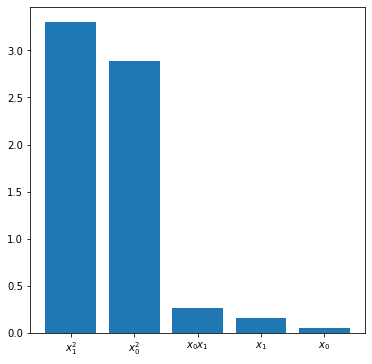

In [5]:
feat_importance, feat_names, sort_order = es.feature_importance(format_names=True)

fig, ax = plt.subplots(1,1, figsize=(6,6))
ax.bar(x=np.arange(feat_importance.size), height=feat_importance, tick_label=['${}$'.format(name) for name in feat_names])
plt.savefig('./feature_importance.png', dpi=300)
plt.draw()